# IBM Advanced Data Science Coursera Notebook

## This is the code that I have completed for my IBM Advanced Data Science certification.

### Step 1: Import the relevant packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression

### Step 2: Import the Datasets using Pandas.

In [2]:
total_job_adverts = pd.read_csv("Jobs_1.csv")

In [3]:
virus_cases = pd.read_csv("Cases.csv")

### Step 3: Double Check to see they have been successfully imported.

In [4]:
total_job_adverts.head()

,"Total job adverts by Adzuna Category, UK, Index 2019 average = 100",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,07/02/2018,15/02/2018,22/02/2018,01/03/2018,08/03/2018,15/03/2018,22/03/2018,29/03/2018,05/04/2018,...,15/01/2021,22/01/2021,29/01/2021,05/02/2021,12/02/2021,19/02/2021,26/02/2021,05/03/2021,NaN,NaN
2,Manufacturing,126.3,137.3,137.7,133.4,121.7,138.2,133.8,129.4,129.9,...,55.7,68.3,76.8,76.0,80.3,84.9,89.6,85.9,NaN,NaN
3,Energy / oil & gas,120.9,126.1,124.9,125.0,123.4,145.3,142.6,139.9,185.9,...,58.3,80.7,78.5,81.9,80.0,81.9,83.8,79.5,NaN,NaN
4,Construction / trades,111.6,110.5,109.2,108.7,91.7,105.7,104.6,103.5,101.6,...,75.8,94.5,105.6,94.3,111.2,111.9,112.6,121.6,NaN,NaN


In [5]:
virus_cases.head()

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
0,overview,United Kingdom,K02000001,2021-03-11,2173,4248286
1,overview,United Kingdom,K02000001,2021-03-10,5595,4246113
2,overview,United Kingdom,K02000001,2021-03-09,6208,4240518
3,overview,United Kingdom,K02000001,2021-03-08,6790,4234310
4,overview,United Kingdom,K02000001,2021-03-07,4314,4227520


### Step 4: Clean the total job adverts dataset.

In [6]:
# Drop the row of Nan values.
total_job_adverts = total_job_adverts.drop([0])

In [7]:
# Drop the extra empty row values from our dataset.
total_job_adverts = total_job_adverts.drop(total_job_adverts.index[31:69])

In [8]:
# Set Date as the new header and remove it as a column value.
header = total_job_adverts.iloc[0] 
total_job_adverts = total_job_adverts[1:] 
total_job_adverts.columns = header

In [9]:
# Drop values for the time preceeding the Covid Pandemic, this data may be useful though to compare year on year.
total_job_adverts= total_job_adverts.drop(total_job_adverts.iloc[:, 1:104], axis = 1)

In [10]:
# Finally, drop all the na column values.
total_job_adverts= total_job_adverts.dropna(axis='columns')
total_job_adverts.head()

1,Date,30/01/2020,07/02/2020,13/02/2020,21/02/2020,27/02/2020,06/03/2020,12/03/2020,20/03/2020,27/03/2020,...,31/12/2020,08/01/2021,15/01/2021,22/01/2021,29/01/2021,05/02/2021,12/02/2021,19/02/2021,26/02/2021,05/03/2021
2,Manufacturing,63.6,62.5,62.6,48.6,60.1,66.1,53.4,58.7,50.0,...,64.7,63.4,55.7,68.3,76.8,76.0,80.3,84.9,89.6,85.9
3,Energy / oil & gas,119.5,107.3,113.0,103.9,113.7,122.5,95.0,98.6,75.4,...,66.4,71.3,58.3,80.7,78.5,81.9,80.0,81.9,83.8,79.5
4,Construction / trades,87.3,87.7,89.1,81.1,84.3,95.2,81.0,82.4,69.5,...,80.7,80.5,75.8,94.5,105.6,94.3,111.2,111.9,112.6,121.6
5,Wholesale and retail,83.1,84.0,86.6,82.7,87.8,91.4,79.6,76.2,57.6,...,48.1,48.7,43.4,47.0,54.1,47.9,46.7,47.1,47.5,50.1
6,Graduate,144.0,148.0,150.1,129.2,129.1,144.9,127.7,125.7,105.2,...,67.4,63.0,60.4,59.3,59.1,67.7,69.1,69.6,70.2,71.5


### Step 5: Clean the virus cases dataset

In [11]:
# Firstly, drop the unneccessary columns from the virus dataset.
virus_cases = virus_cases.drop(columns = ['areaType', 'areaName', 'areaCode'])
virus_cases.head()

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
0,2021-03-11,2173,4248286
1,2021-03-10,5595,4246113
2,2021-03-09,6208,4240518
3,2021-03-08,6790,4234310
4,2021-03-07,4314,4227520


In [12]:
# Then convert the date column from days into weeks through resampling.
virus_cases['date'] = pd.to_datetime(virus_cases['date'])
weekly_virus_cases = virus_cases.resample('W', on='date').sum()
weekly_virus_cases.head()

,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,
2020-02-02,2,8
2020-02-09,6,28
2020-02-16,1,62
2020-02-23,2,67
2020-03-01,58,241


In [13]:
# Finally, drop the additional weeks that do not match up since one dataset is updated more regularly than the other.
weekly_virus_cases.drop(weekly_virus_cases.tail(0).index,inplace=True)
weekly_virus_cases.drop(weekly_virus_cases.tail(1).index,inplace=True)

### Step 6: Merge the datasets together.

In [14]:
# Here, we are only interested in the 'All industries' row, however you could investigate further specific sectors.
# This could be done by selecting the row that corresponds to your industry of choice.

all_industries = total_job_adverts.loc[31]
all_industries = all_industries [:].values
all_industries 

array(['All industries', '94.1', '94.9', '97.1', '88.0', '91.6', '97.2',
       '87.8', '85.3', '74.5', '63.0', '57.3', '48.5', '41.4', '38.2',
       '38.3', '35.2', '36.5', '37.1', '37.6', '41.8', '41.4', '43.2',
       '39.7', '40.7', '44.5', '44.0', '45.6', '54.1', '54.4', '54.5',
       '55.1', '50.1', '53.5', '55.1', '59.4', '61.2', '62.8', '65.6',
       '69.7', '69.7', '66.8', '68.3', '69.1', '73.4', '71.7', '66.7',
       '69.5', '71.1', '62.8', '61.1', '59.8', '68.3', '73.3', '75.6',
       '78.5', '78.6', '78.6', '82.1'], dtype=object)

In [15]:
# Let's now stick this array into a dataframe.

job_adverts = pd.DataFrame(all_industries)
job_adverts.columns = ['All Industries']
job_adverts = job_adverts.drop(0)
job_adverts.head()

,All Industries
1,94.1
2,94.9
3,97.1
4,88.0
5,91.6


In [16]:
# Add the job adverts index to the weekly cases dataset.
weekly_virus_cases["Job advert index"] = job_adverts.values

In [17]:
# Rename the dataset, and print.
merged = weekly_virus_cases
merged.head()

,newCasesBySpecimenDate,cumCasesBySpecimenDate,Job advert index
date,,,
2020-02-02,2,8,94.1
2020-02-09,6,28,94.9
2020-02-16,1,62,97.1
2020-02-23,2,67,88.0
2020-03-01,58,241,91.6


### Step 7: Let's Build our Linear Regression Model.

In [18]:
# Get the two columns we are interested in modeling together from the merged dataset.
data = merged[['newCasesBySpecimenDate', 'Job advert index']]

# Neural Network Values call
neural_data = merged[['newCasesBySpecimenDate', 'Job advert index']]

In [19]:
# Set our X and y from this dataset.
X = data['newCasesBySpecimenDate'].values.reshape(-1, 1).tolist()
y = data['Job advert index'].values.reshape(-1, 1).tolist()

In [20]:
# Store them as float values.
X = np.array(X, float)
y = np.array(y, float)

In [21]:
# Perform a test train split on our data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
# Setup our Linear Regression Model and fit it it to our training data.
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Make our predictions. 
linear_predictions = linear_regression_model.predict(X_test)

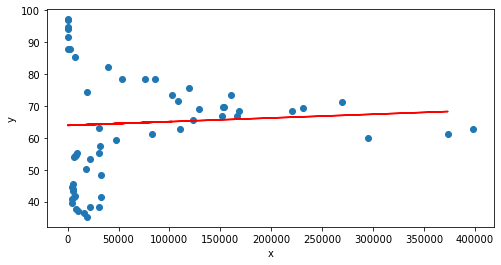

In [24]:
# Plot our model predictions against the test values.

plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(X, y)
ax.plot(X_test, linear_predictions, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

In [25]:
# Finally, report back on the accuracy of our generated model.

li_MSE = metrics.mean_squared_error(y_test, linear_predictions)
li_RMSE = np.sqrt(metrics.mean_squared_error(y_test, linear_predictions))
li_R2 = metrics.r2_score(y_test, linear_predictions)

print('This model is generating an MSE score of:', round(li_MSE,2))
print('It is also generating an RMSE score of:', round(li_RMSE,2))
print('And a R^2 score of:', round(li_R2,2))

This model is generating an MSE score of: 418.09
It is also generating an RMSE score of: 20.45
And a R^2 score of: -0.12


### Step 8: Build our Logistic Regression Model

In [26]:
# Recall our X and y, so it doesn't run through our regression model as continous float values.
X = data['newCasesBySpecimenDate'].values.reshape(-1, 1).tolist()
y = data['Job advert index'].values.reshape(-1, 1).tolist()

In [27]:
# Reperform a test train split on our data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
# Setup our Logistic Regression Model and fit it it to our training data.
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=0)
logistic_regression_model.fit(X_train, y_train)

C:\Users\Arron\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [29]:
# Make our predictions. 
logistic_predictions = logistic_regression_model.predict(X_test)

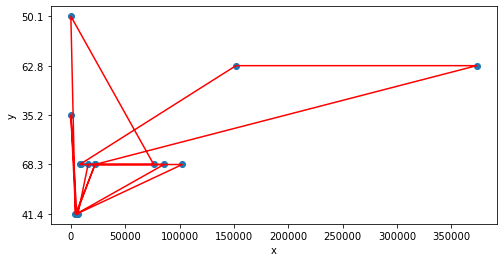

In [30]:
# Plot our model predictions against the test values.

plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(X_test, logistic_predictions)
ax.plot(X_test, logistic_predictions, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

In [31]:
# Convert predictions and test values into a float array.
logistic_predictions = np.array(logistic_predictions, float) 
y_test = np.array(y_test, float)

In [32]:
# Finally, report back on the accuracy of our generated model.
lo_MSE = metrics.mean_squared_error(y_test, logistic_predictions)
lo_RMSE = np.sqrt(metrics.mean_squared_error(y_test, logistic_predictions))
lo_R2 = metrics.r2_score(y_test, logistic_predictions)

print('This model is generating an MSE score of:', round(lo_MSE,2))
print('It is also generating an RMSE score of:', round(lo_RMSE,2))
print('And a R^2 score of:', round(lo_R2,2))

This model is generating an MSE score of: 517.47
It is also generating an RMSE score of: 22.75
And a R^2 score of: -0.39


### Step 9: Build our Random Forest Model

In [33]:
# Firstly, again let's recall our X and y datasets.
X = data['newCasesBySpecimenDate'].values.reshape(-1, 1).tolist()
y = data['Job advert index'].values.reshape(-1, 1).tolist()

In [34]:
# Store them as float values.
X = np.array(X, float)
y = np.array(y, float)

In [35]:
# Reperform a test train split on our data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
# Setup our Random Forest Model and fit it it to our training data.
random_forest_model = RandomForestRegressor(n_estimators = 100)
random_forest_model.fit(X_train, y_train)

C:\Users\Arron\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [37]:
# Make our predictions. 
forest_predictions = random_forest_model.predict(X_test)

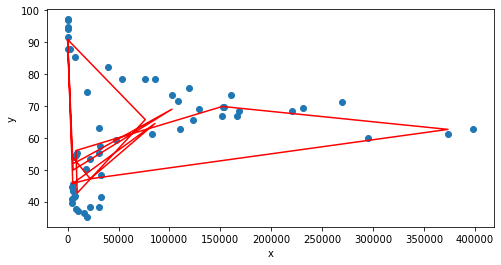

In [38]:
# Plot our model predictions against the test values.

plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(X, y)
ax.plot(X_test, forest_predictions, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

In [39]:
# Finally, report back on the accuracy of our generated model.
rf_MSE = metrics.mean_squared_error(y_test, forest_predictions)
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, forest_predictions))
rf_R2 = metrics.r2_score(y_test, forest_predictions)

print('This model is generating an MSE score of:', round(rf_MSE,2))
print('It is also generating an RMSE score of:', round(rf_RMSE,2))
print('And a R^2 score of:', round(rf_R2,2))

This model is generating an MSE score of: 100.05
It is also generating an RMSE score of: 10.0
And a R^2 score of: 0.73


### Step 10: Build our K means clustering model

In [40]:
# Firstly, let's get our entire dataset.
data = np.array(data).astype(float)

In [41]:
# Then, let's perform a test train split on it.
train_data, test_data = train_test_split(data, test_size=0.3, random_state=101)

In [42]:
# Now, let's set up our 5 clusters for our data.
kmeans = KMeans(n_clusters= 5)

In [43]:
# So, let's firstly investigate the whole dataset and then focus in on our training and testing sets.
All_dataset_predictions = kmeans.fit_predict(data)

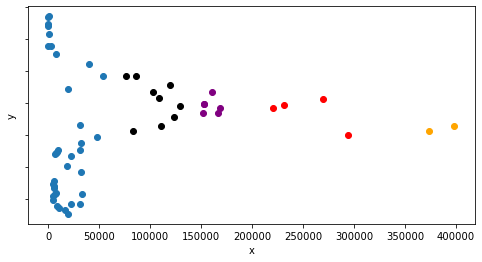

In [44]:
# And graph this.

filtered_label0 = data[All_dataset_predictions == 0]
filtered_label1 = data[All_dataset_predictions == 1]
filtered_label2 = data[All_dataset_predictions == 2]
filtered_label3 = data[All_dataset_predictions == 3]
filtered_label4 = data[All_dataset_predictions == 4]


plt.figure(figsize=(8, 4))
ax = plt.axes()
 
ax.scatter(filtered_label0[:,0] , filtered_label0[:,1])
ax.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
ax.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
ax.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
ax.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'purple')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_yticklabels([])
ax.axis('tight')
plt.show()


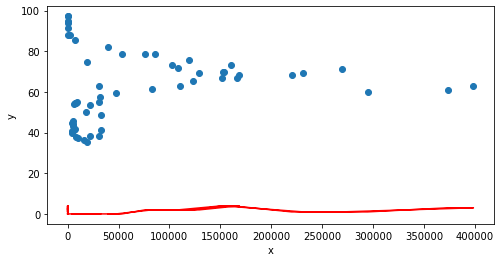

In [45]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(X, y)
ax.plot(data, All_dataset_predictions, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

In [46]:
# Now, let's focus in on our training and testing sets.
kmeans.fit(train_data)
training_data_prediction = kmeans.predict(test_data)

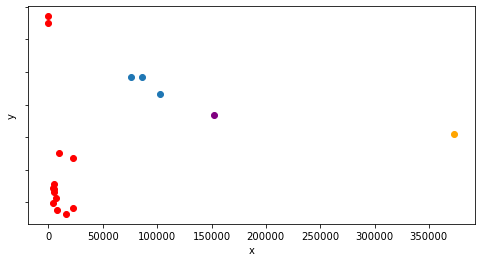

In [47]:
# And again, graph this accordingly.

filtered_label0 = test_data[training_data_prediction == 0]
filtered_label1 = test_data[training_data_prediction == 1]
filtered_label2 = test_data[training_data_prediction == 2]
filtered_label3 = test_data[training_data_prediction == 3]
filtered_label4 = test_data[training_data_prediction == 4]


plt.figure(figsize=(8, 4))
ax = plt.axes()
 
ax.scatter(filtered_label0[:,0] , filtered_label0[:,1])
ax.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
ax.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
ax.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
ax.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'purple')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_yticklabels([])
ax.axis('tight')
plt.show()

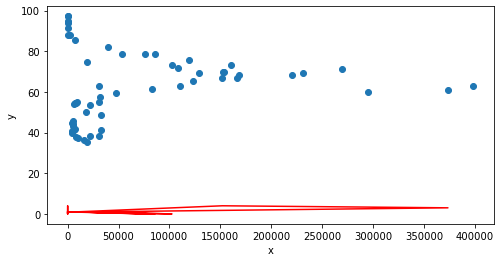

In [48]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(X, y)
ax.plot(test_data, training_data_prediction, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

In [49]:
# Let's now get our y testing values in float form alognside our training data predictions.
y_test = np.array(y_test, float)
training_data_prediction= np.array(training_data_prediction, float)

In [50]:
# Finally, report back on the accuracy of our generated model.
km_MSE = metrics.mean_squared_error(y_test, training_data_prediction)
km_RMSE = np.sqrt(metrics.mean_squared_error(y_test, training_data_prediction))
km_R2 = metrics.r2_score(y_test, training_data_prediction)

print('This model is generating an MSE score of:', round(km_MSE,2))
print('It is also generating an RMSE score of:', round(km_RMSE,2))
print('And a R^2 score of:', round(km_R2,2))

This model is generating an MSE score of: 3522.35
It is also generating an RMSE score of: 59.35
And a R^2 score of: -8.46


### Step 11: Let's build our neural network model.

In [51]:
# Firstly, again let's recall our X and y daatsets.
X = neural_data['newCasesBySpecimenDate'].values.reshape(-1, 1).tolist()
y = neural_data['Job advert index'].values.reshape(-1, 1).tolist()

In [52]:
# Store them as float values.
X = np.array(X, float)
y = np.array(y, float)

In [53]:
# Then, let's perform another test train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
# Now, Let's scaler down our X_training set. 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [55]:
# And transform our training and testing sets likewise.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Setup our neural network model and fit it it to our training data.
neural_network_model = MLPRegressor(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
neural_network_model.fit(X_train, y_train)

C:\Users\Arron\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Arron\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=(20, 20, 20), max_iter=1000)

In [57]:
# Make our predictions.
neural_network_predictions = neural_network_model.predict(X_test)

C:\Users\Arron\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

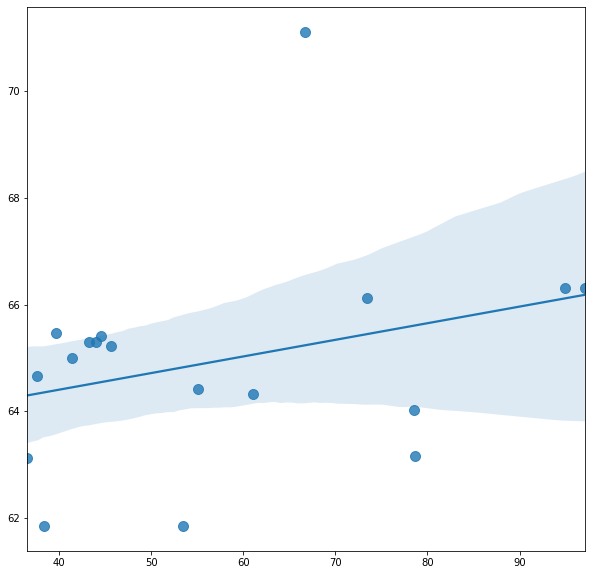

In [58]:
# Let's use a Regplot to graph and see how well our model is performing.
plt.figure(figsize=(10,10))
sns.regplot(y_test, neural_network_predictions, fit_reg=True, scatter_kws={"s": 100})

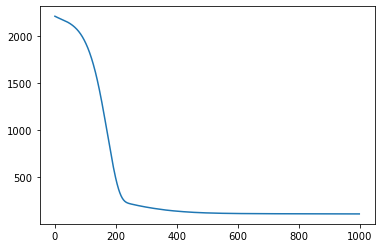

In [59]:
# Let's also take a look at the loss curve for our model.
plt.plot(neural_network_model.loss_curve_)

In [60]:
# Now, let's convert our predictions and test values into a float array.
y_test = np.array(y_test, float)
neural_network_predictions = np.array(neural_network_predictions, float)

In [61]:
# And finally, report back on the accuracy of our generated model.
nn_MSE = metrics.mean_squared_error(y_test, neural_network_predictions)
nn_RMSE = np.sqrt(metrics.mean_squared_error(y_test, neural_network_predictions))
nn_R2 = metrics.r2_score(y_test, neural_network_predictions)

print('This model is generating an MSE score of:', round(nn_MSE,2))
print('It is also generating an RMSE score of:', round(nn_R2,2))
print('And a R^2 score of:', round(nn_R2,2))

This model is generating an MSE score of: 412.94
It is also generating an RMSE score of: -0.11
And a R^2 score of: -0.11


### Step 12: Compare all the models to see which one performs most optimally.

In [62]:
# Let's get the data from all our accuracy results
accuracy_results = {'MSE Score': [round(li_MSE,2), round(lo_MSE,2), round(rf_MSE,2), round(km_MSE,2), round(nn_MSE,2)],
        'RMSE Score': [round(li_RMSE,2), round(lo_RMSE,2), round(rf_RMSE,2), round(km_RMSE,2), round(nn_RMSE,2)],
        'R^2 Score' : [round(li_MSE,2), round(lo_R2,2), round(rf_R2,2), round(km_R2,2), round(nn_R2,2)]}

In [63]:
# And stick in into a pandas dataframe.
results = pd.DataFrame(accuracy_results, columns = ['MSE Score','RMSE Score', 'R^2 Score'], 
index=['Linear Regression Model','Logistic Regression Model','Random Forest Model','K Means Clustering Model', 'Neural Network Model'])
results

,MSE Score,RMSE Score,R^2 Score
Linear Regression Model,418.09,20.45,418.09
Logistic Regression Model,517.47,22.75,-0.39
Random Forest Model,100.05,10.00,0.73
K Means Clustering Model,3522.35,59.35,-8.46
Neural Network Model,412.94,20.32,-0.11
